# <div style="text-align: center"> <font size=+5> <ins>PREPARE DATASETS</ins> </font> </div>
___

In [1]:
import numpy as np
import pandas as pd

___
# Preparing questionnaires data

needs `pyreadstat` module

In [132]:
#load raw data

import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    raw_data_issp = {
        1993 : pd.read_spss("Raw_Data/Datasets_questions/issp_env_data_1993.sav"),
        2000 : pd.read_spss("Raw_Data/Datasets_questions/issp_env_data_2000.sav"),
        2010 : pd.read_spss("Raw_Data/Datasets_questions/issp_env_data_2010.sav"),
        2020 : pd.read_spss("Raw_Data/Datasets_questions/issp_env_data_2020.sav"),
    }

In [133]:
#get common columns in raw data and rename

common_cols_issp = {
    "Respondent ID" : {1993 : "V2", 2000 : "V2", 2010 : "CASEID", 2020 : "CASEID"},
    "Country" : {1993 : "V3", 2000 : "V3", 2010 : "country", 2020 : "country"},
    "Weight" : {1993 : "V419", 2000 : "V327", 2010 : "WEIGHT", 2020 : "WEIGHT"},
    "Private enterprise solves economic problems" : {1993 : "V5", 2000 : "V4", 2010 : "v7", 2020 : "v3"},
    "Government responsible for reducing income differences" : {1993 : "V6", 2000 : "V5", 2010 : "v8", 2020 : "v4"},
    "Highest priority for country" : {1993 : "V7", 2000 : "V6", 2010 : "v9", 2020 : "v8"},
    "Second highest priority for country" : {1993 : "V8", 2000 : "V7", 2010 : "v10", 2020 : "v9"},
    "Science solves environmental problems" : {1993 : "V12", 2000 : "V10", 2010 : "v22", 2020 : "v20"},
    "We worry too much about future environment" : {1993 : "V13", 2000 : "V11", 2010 : "v23", 2020 : "v21"},
    "Almost everything in modern life harms the environment" : {1993 : "V14", 2000 : "V12", 2010 : "v24", 2020 : "v22"},
    "We worry too much about harming environment" : {1993 : "V17", 2000 : "V13", 2010 : "v25", 2020 : "v23"},
    "Environmental protection needs economic growth" : {1993 : "V19", 2000 : "V14", 2010 : "v26", 2020 : "v24"},
    "Economic growth harms environment" : {1993 : "V22", 2000 : "V16", 2010 : "v27", 2020 : "v25"},
    "Willingness to Make Trade-Offs for Environment (Pay much higher prices)" : {1993 : "V24", 2000 : "V19", 2010 : "v29", 2020 : "v26"},
    "Willingness to Make Trade-Offs for Environment (Pay much higher taxes)" : {1993 : "V25", 2000 : "V20", 2010 : "v30", 2020 : "v27"},
    "Willingness to Make Trade-Offs for Environment (Cut your standard of living)" : {1993 : "V26", 2000 : "V21", 2010 : "v31", 2020 : "v28"},
    "Sort glass for recycling" : {1993 : "V56", 2000 : "V56", 2010 : "v55", 2020 : "v52"},
    "Member of a group to preserve environment" : {1993 : "V60", 2000 : "V58", 2010 : "v61", 2020 : "v54"},
    "In the last five years, signed a petition" : {1993 : "V61", 2000 : "V59", 2010 : "v62", 2020 : "v55"},
    "In the last five years, given money" : {1993 : "V62", 2000 : "V60", 2010 : "v63", 2020 : "v56"},
    "In the last five years, participated in an environmental demonstration" : {1993 : "V63", 2000 : "V61", 2010 : "v64", 2020 : "v57"},
    "Too difficult to do much about environment" : {1993 : "V27", 2000 : "V22", 2010 : "v32", 2020 : "v30"},
    "I do what is right even when it costs money and takes time" : {1993 : "V28", 2000 : "V23", 2010 : "v33", 2020 : "v31"},
    "Danger to the environment (Air pollution by cars)" : {1993 : "V41", 2000 : "V33", 2010 : "v39", 2020 : "v37"},
    "Danger to the environment (Air pollution by industry)" : {1993 : "V46", 2000 : "V35", 2010 : "v40", 2020 : "v38"},
    "Danger to the environment (Pesticides and chemicals in farming)" : {1993 : "V48", 2000 : "V36", 2010 : "v41", 2020 : "v39"},
    "Danger to the environment (River, lake and stream pollution)" : {1993 : "V50", 2000 : "V37", 2010 : "v42", 2020 : "v40"},
    "Danger to the environment (Rise in the world’s temperature)" : {1993 : "V52", 2000 : "V38", 2010 : "v43", 2020 : "v41"},
    "Danger to the environment (Nuclear power stations)" : {1993 : "V44", 2000 : "V64", 2010 : "v45", 2020 : "v43"},
    #"" : {1993 : "V", 2000 : "V", 2010 : "v", 2020 : "v"},
}

data_filtered_issp = {year : pd.DataFrame() for year in [1993, 2000, 2010, 2020]}
for year in data_filtered_issp:
    for col, col_idx in common_cols_issp.items():
        data_filtered_issp[year][col] = raw_data_issp[year][col_idx[year]]

In [134]:
#match country names for different years

countries_codes_issp = {
    1993 : {
        'Australia - AUS' : "Australia",
        'Bulgaria - BG' : "Bulgaria",
        'Canada - CDN' : "Canada",
        'Czech Republic - CR' : "Czechia",
        'Germany-East - D-E' : "Germany",
        'Germany-West - D-W' : "Germany",
        'Great Britain - GB' : "United Kingdom",
        'Hungary - H' : "Hungary",
        'Ireland - IRL' : "Ireland",
        'Israel - IL' : "Israel", 
        'Italy - I' : "Italy",
        'Japan - J' : "Japan",
        'Netherlands - NL' : "Netherlands",
        'New Zealand - NZ' : "New Zealand",
        'Northern Ireland - NIRL' : "United Kingdom",
        'Norway - N' : "Norway",
        'Philippines - RP' : "Philippines",
        'Poland - PL' : "Poland",
        'Russia - RUS' : "Russia",
        'Slovenia - SLO' : "Slovenia",
        'Spain - E' : "Spain",
        'United States - USA' : "United States"
    },

    2000 : {
        'A-Austria' : "Austria",
        'BG-Bulgaria' : "Bulgaria",
        'CDN-Canada' : "Canada",
        'CH-Switzerland' : "Switzerland",
        'CZ-Czech Republic' : "Czechia",
        'D-E-Germany-East' : "Germany",
        'D-W-Germany-West' : "Germany",
        'DK-Denmark' : "Denmark",
        'E-Spain' : "Spain",
        'GB-Great Britain' : "United Kingdom",
        'IL-Israel' : "Israel",
        'IRL-Ireland' : "Ireland",
        'J-Japan' : "Japan",
        'LV-Latvia' : "Latvia",
        'MEX-Mexico' : "Mexico",
        'N-Norway' : "Norway",
        'NIRL-Northern Ireland' : "United Kingdom",
        'NL-Netherlands' : "Netherlands",
        'NZ-New Zealand' : "New Zealand",
        'P-Portugal' : "Portugal",
        'RCH-Chile' : "Chile",
        'RP-Philippines' : "Philippines",
        'RUS-Russia' : "Russia",
        'S-Sweden' : "Sweden",
        'SF-Finland' : "Finland",
        'SLO-Slovenia' : "Slovenia",
        'USA-United States' : "United States"
    },

    2010 : {
        'AR-Argentina' : "Argentina",
        'AT-Austria' : "Austria",
        'AU-Australia' : "Australia",
        'BE-Belgium' : "Belgium",
        'BG-Bulgaria' : "Bulgaria",
        'CA-Canada' : "Canada",
        'CH-Switzerland' : "Switzerland",
        'CL-Chile' : "Chile",
        'CZ-Czech Republic' : "Czechia",
        'DE-Germany' : "Germany",
        'DK-Denmark' : "Denmark",
        'ES-Spain' : "Spain",
        'FI-Finland' : "Finland",
        'FR-France' : "France",
        'GB-Great Britain and/or United Kingdom' : "United Kingdom",
        'HR-Croatia' : "Croatia",
        'IL-Israel' : "Israel",
        'IS-Iceland' : "Iceland",
        'JP-Japan' : "Japan",
        'KR-Korea (South)' : "South Corea",
        'LT-Lithuania' : "Lithuania",
        'LV-Latvia' : "Latvia",
        'MX-Mexico' : "Mexico",
        'NL-Netherlands' : "Netherlands",
        'NO-Norway' : "Norway",
        'NZ-New Zealand' : "New Zealand",
        'PH-Philippines' : "Philippines",
        'PT-Portugal' : "Portugal",
        'RU-Russia' : "Russia",
        'SE-Sweden' : "Sweden",
        'SI-Slovenia' : "Slovenia",
        'SK-Slovakia' : "Slovakia",
        'TR-Turkey' : "Turkiye",
        'TW-Taiwan' : "Taiwan",
        'US-United States' : "United States",
        'ZA-South Africa' : "South Africa"
    },

    2020 : {
        'AT-Austria' : "Austria",
        'AU-Australia' : "Australia",
        'CH-Switzerland' : "Switzerland",
        'CN-China' : "China",
        'DE-Germany' : "Germany",
        'DK-Denmark' : "Denmark",
        'ES-Spain' : "Spain",
        'FI-Finland' : "Finland",
        'FR-France' : "France",
        'HR-Croatia' : "Croatia",
        'HU-Hungary' : "Hungary",
        'IN-India' : "India",
        'IS-Iceland' : "Iceland",
        'IT-Italy' : "Italy",
        'JP-Japan' : "Japan",
        'KR-Korea (South)' : "South Corea",
        'LT-Lithuania' : "Lithuania",
        'NO-Norway' : "Norway",
        'NZ-New Zealand' : "New Zealand",
        'PH-Philippines' : "Philippines",
        'RU-Russia' : "Russia",
        'SE-Sweden' : "Sweden",
        'SI-Slovenia' : "Slovenia",
        'SK-Slovakia' : "Slovakia",
        'TH-Thailand' : "Thailand",
        'TW-Taiwan' : "Taiwan",
        'US-United States' : "United States",
        'ZA-South Africa' : "South Africa"
    }
}

for year in data_filtered_issp:
    data_filtered_issp[year]["Country"] = data_filtered_issp[year]["Country"].map(lambda x: countries_codes_issp[year][x])

In [135]:
#fix data without weight (set to 1)

for year in data_filtered_issp:
    data_filtered_issp[year]["Weight"] = data_filtered_issp[year]["Weight"].map(lambda x: 1 if type(x) == str else x)

In [152]:
#fix other labels not matching between different years

labels_issp = {
    "Neither agree nor disagree" : "Neither Agree nor Disagree",
    "N Agree Nor Disagr" : "Neither Agree nor Disagree",
    "Neither Agree Nor Disagree" : "Neither Agree nor Disagree",
    "Agree strongly" : "Strongly Agree",
    "Disagree strongly" : "Strongly Disagree",
    "Neither nor" : "Neither willing nor unwilling",
    "Order in Nation" : "Maintain order in the nation",
    "Order in the Nation" : "Maintain order in the nation",
    "People more say" : "Give people more say in government decisions",
    "Recycling nav" : "Never", #only 1993-2000 -> converted to "never" (?)
    "Extrem danger enviroment" : "Extremely dangerous",
    "Extremely dangerous for the environment" : "Extremely dangerous",
    "Not dangerous at all for the environment" : "Not dangerous at all",
    "Yes, I have" : "Yes",
    "No, I have not" : "No",
}

for year in data_filtered_issp:
    data_filtered_issp[year] = data_filtered_issp[year].map(lambda x: labels_issp[x] if x in labels_issp else x)

In [158]:
#getting full dataframe  --> varName: `data_issp`

data_issp = pd.concat(data_filtered_issp.values(),keys=data_filtered_issp.keys())
data_issp["Year"] = [x[0] for x in data_issp.index]
data_issp = data_issp.set_index(["Year", "Country", "Respondent ID"])
data_issp.index.rename(["Year", "Country", "Respondent ID"])
data_issp["Sort glass for recycling"] = data_issp["Sort glass for recycling"].astype("category")

#fixing categorical variables order for plotting
for col in data_issp.select_dtypes(include="category").columns.values:
    if "Agree" in data_issp[col].values:
        data_issp[col] = pd.Categorical(data_issp[col], ["Strongly Agree", "Agree", "Neither Agree nor Disagree", "Disagree", "Strongly Disagree"])
    if "Very willing" in data_issp[col].values:
        data_issp[col] = pd.Categorical(data_issp[col], ["Very willing", "Fairly willing", "Neither willing nor unwilling", "Fairly unwilling", "Very unwilling"])
    if "Extremely dangerous" in data_issp[col].values:
        data_issp[col] = pd.Categorical(data_issp[col], ["Extremely dangerous", "Very dangerous", "Somewhat dangerous", "Not very dangerous", "Not dangerous at all"])
    if "Yes" in data_issp[col].values:
        data_issp[col] = pd.Categorical(data_issp[col], ["Yes", "No"])
    if "Always" in data_issp[col].values:
        data_issp[col] = pd.Categorical(data_issp[col], ["Always", "Often", "Sometimes", "Never"])

In [159]:
# dump to file
data_issp.to_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

___
# Preparing GDP growth data

In [4]:
#load raw data
raw_data_GDPgrowth = pd.read_csv("Raw_Data/Economy/worldbank_gdp_growth.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_GDPgrowth.set_index("Country Name", drop=True, inplace=True)
raw_data_GDPgrowth.columns = raw_data_GDPgrowth.columns.astype(int)

In [12]:
#getting full dataframe --> varName: `data_GDPgrowth`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

years_to_average = 3 #how many years to evaluate (years == 3 --> growth from 1990 to 1993, 1997 to 2000...)

data_GDPgrowth = pd.DataFrame()
for year in [1993,2000,2010,2020]:
    data_GDPgrowth[year] = ((1+0.01*raw_data_GDPgrowth.loc[:,year-years_to_average+1:year]).prod(axis=1)-1)*100

data_GDPgrowth = data_GDPgrowth.map(lambda x: np.nan if x == 0.0 else x)

countries_names_GDP = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_GDPgrowth.index = data_GDPgrowth.index.map(lambda x: countries_names_GDP[x] if x in countries_names_GDP else x)
data_GDPgrowth.index.names = ["Country"]

data_GDPgrowth = data_GDPgrowth.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_GDPgrowth.index.values],:]

In [36]:
#dump to file
data_GDPgrowth.to_pickle("Processed_Data/indicators/GDP_growth.pickle")

In [15]:
data_GDPgrowth

,1993,2000,2010,2020
Country,,,,
Argentina,27.462761,-0.457261,7.811201,-14.014327
Australia,4.091114,14.236093,7.896710,4.798938
Austria,6.163552,10.886097,-0.565379,-2.981319
Belgium,2.397289,9.497903,1.236110,-1.401144
Bulgaria,-16.360214,-0.563808,4.172696,2.601445
Canada,1.406095,14.847057,1.081879,-0.571476
Switzerland,-1.083924,8.889534,3.703965,1.806936
Chile,27.738763,9.061122,8.634479,-1.675123
China,42.132478,25.966473,32.714858,15.633863


___
# Preparing GDP per capita data

In [13]:
#load raw data
raw_data_GDP = pd.read_csv("Raw_Data/Economy/worldbank_gdp_per_capita.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_GDP.set_index("Country Name", drop=True, inplace=True)
raw_data_GDP.columns = raw_data_GDP.columns.astype(int)

In [14]:
#getting full dataframe --> varName: `data_GDP`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_GDP = raw_data_GDP[[1993,1995,2000,2010,2020]].copy()

#few countries don't have 1993 data --> using 1995
for c in data_GDP.index:
    if np.isnan(data_GDP.loc[c, 1993]):
        data_GDP.loc[c,1993] = data_GDP.loc[c,1995]
data_GDP = data_GDP.drop(columns=[1995])

countries_names_GDP = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_GDP.index = data_GDP.index.map(lambda x: countries_names_GDP[x] if x in countries_names_GDP else x)
data_GDP.index.names = ["Country"]

data_GDP = data_GDP.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_GDP.index.values],:]

In [59]:
#dump to file
data_GDP.to_pickle("Processed_Data/indicators/GDP_pcap.pickle")

In [58]:
data_GDP

,1993,2000,2010,2020
Country,,,,
Argentina,6957.417499,7666.517834,10385.964432,8500.837939
Australia,17699.557739,21870.415967,52147.024194,51868.247557
Austria,24081.527793,24625.600723,46903.761585,48789.497850
Belgium,22283.936021,23098.886508,44184.946354,45609.003494
Bulgaria,1278.525114,1621.262107,6863.667068,10148.342395
Canada,20186.798878,24271.002056,47562.083425,43562.435831
Switzerland,39237.118656,38865.021940,76531.372941,85897.784334
Chile,3520.932955,5102.968761,12764.593118,13173.784794
China,525.365692,959.360431,4550.473944,10408.719554


___
# Preparing GDP per capita (Purchasing Power Parity, current international $)

In [267]:
#load raw data
raw_data_GDP_PPP = pd.read_csv("Raw_Data/Economy/worldbank_gdp_per_capita_PPP.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_GDP_PPP.set_index("Country Name", drop=True, inplace=True)
raw_data_GDP_PPP.columns = raw_data_GDP_PPP.columns.astype(int)

In [270]:
#getting full dataframe --> varName: `data_GDP_PPP`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_GDP_PPP = raw_data_GDP_PPP[[1993,1995,2000,2010,2020]].copy()

#few countries don't have 1993 data --> using 1995
for c in data_GDP_PPP.index:
    if np.isnan(data_GDP_PPP.loc[c, 1993]):
        data_GDP_PPP.loc[c,1993] = data_GDP_PPP.loc[c,1995]
data_GDP_PPP = data_GDP_PPP.drop(columns=[1995])

countries_names_GDP_PPP = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_GDP_PPP.index = data_GDP_PPP.index.map(lambda x: countries_names_GDP_PPP[x] if x in countries_names_GDP_PPP else x)
data_GDP_PPP.index.names = ["Country"]

data_GDP_PPP = data_GDP_PPP.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_GDP_PPP.index.values],:]

In [272]:
#dump to file
data_GDP_PPP.to_pickle("Processed_Data/indicators/GDP_pcap_ppp.pickle")

In [271]:
data_GDP_PPP

,1993,2000,2010,2020
Country,,,,
Argentina,9506.505431,11542.986003,18063.914343,20797.725953
Australia,19215.960587,26541.665321,39374.605918,53216.468537
Austria,21732.871094,29381.684877,42007.293746,57235.545869
Belgium,20473.786838,27789.943546,39838.040511,54679.141805
Bulgaria,7034.874678,6422.832771,14958.272280,25096.704913
Canada,21440.046986,29362.084161,40099.448239,47226.365140
Switzerland,29496.774927,36697.628041,54438.978701,71010.433495
Chile,6026.750351,9468.318799,18104.724596,24941.235088
China,1454.491592,2917.242530,9254.779604,17209.442954


___
# Preparing PM2.5 exposure data

In [29]:
#load raw data
raw_data_PM25 = pd.read_csv("Raw_Data/Environment/oecd_pm25_exposure.csv", usecols=["Country", "Year", "Value"]).pivot(index="Country", columns="Year", values="Value")


countries_names_PM25 = {
    "Türkiye" : "Turkiye",
    "Korea" : "South Corea",
    "Slovak Republic" : "Slovakia",
    "China (People's Republic of)" : "China",
    "Chinese Taipei" : "Taiwan"
}
raw_data_PM25.index = raw_data_PM25.index.map(lambda x: countries_names_PM25[x] if x in countries_names_PM25 else x)

data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")
raw_data_PM25 = raw_data_PM25.loc[[idx for idx in raw_data_PM25.index.values if idx in np.append(data_issp.index.get_level_values("Country").unique(), "World")]]

In [30]:
#getting full dataframe --> varName: `data_PM25`

data_PM25 = pd.DataFrame()
data_PM25[1993] = pd.DataFrame([raw_data_PM25[y] for y in [1990,1995]]).mean()
data_PM25[2000] = raw_data_PM25[2000]
data_PM25[2010] = raw_data_PM25[2010]
data_PM25[2020] = raw_data_PM25[2019]

In [49]:
#dump to file
data_PM25.to_pickle("Processed_Data/indicators/PM25_exposure.pickle")

In [31]:
data_PM25

,1993,2000,2010,2020
Country,,,,
Argentina,15.9310,14.471,14.054,13.847
Australia,7.5490,7.366,6.787,6.749
Austria,20.9630,17.429,15.872,12.225
Belgium,20.3490,17.751,16.982,12.726
Bulgaria,28.0765,26.722,23.417,19.927
Canada,9.9035,9.204,7.902,7.090
Chile,23.5190,22.980,21.935,23.683
China,49.7405,50.822,53.243,47.729
Taiwan,24.3320,24.564,22.916,23.534


___
# Preparing greenhouse gases emissions data

In [23]:
#load raw data
raw_data_GHG = pd.read_csv("Raw_Data/Environment/worldbank_ghg_emissions.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_GHG.set_index("Country Name", drop=True, inplace=True)
raw_data_GHG.columns = raw_data_GHG.columns.astype(int)

In [24]:
#getting full dataframe --> varName: `data_GHG`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_GHG = raw_data_GHG[[1993,2000,2010,2020]].copy()

countries_names_GHG = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_GHG.index = data_GHG.index.map(lambda x: countries_names_GHG[x] if x in countries_names_GHG else x)
data_GHG.index.names = ["Country"]

data_GHG = data_GHG.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_GHG.index.values],:]

In [26]:
data_GHG.to_pickle("Processed_Data/indicators/GHG_emissions.pickle")

In [25]:
data_GHG

,1993,2000,2010,2020
Country,,,,
Argentina,2.594608e+05,2.942714e+05,3.424965e+05,3.614330e+05
Australia,4.943261e+05,6.068608e+05,5.894735e+05,5.719031e+05
Austria,7.501536e+04,7.869411e+04,8.355096e+04,7.101783e+04
Belgium,1.315486e+05,1.382664e+05,1.249085e+05,1.000635e+05
Bulgaria,7.405099e+04,5.783765e+04,5.704355e+04,4.649285e+04
Canada,5.493846e+05,6.481944e+05,6.736729e+05,6.777092e+05
Switzerland,5.262784e+04,5.278706e+04,5.476218e+04,4.398764e+04
Chile,4.855648e+04,7.003003e+04,9.181783e+04,1.067223e+05
China,3.744912e+06,4.567274e+06,1.021164e+07,1.294287e+07


___
# Preparing $\mathrm{CO_2}$ emissions per capita

In [256]:
#load raw data
raw_data_CO2_pcap = pd.read_csv("Raw_Data/Environment/worldbank_CO2_per_capita.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_CO2_pcap.set_index("Country Name", drop=True, inplace=True)
raw_data_CO2_pcap.columns = raw_data_CO2_pcap.columns.astype(int)

In [257]:
#getting full dataframe --> varName: `data_CO2_pcap`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_CO2_pcap = raw_data_CO2_pcap[[1993,2000,2010,2020]].copy()

countries_names_CO2 = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_CO2_pcap.index = data_CO2_pcap.index.map(lambda x: countries_names_CO2[x] if x in countries_names_CO2 else x)
data_CO2_pcap.index.names = ["Country"]

data_CO2_pcap = data_CO2_pcap.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_CO2_pcap.index.values],:]

In [258]:
data_CO2_pcap.to_pickle("Processed_Data/indicators/CO2_emissions_per_capita.pickle")

___
# Preparing gini index data

In [219]:
#load raw data
raw_data_gini = pd.read_csv("Raw_Data/Economy/worldbank_gini_index.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_gini.set_index("Country Name", drop=True, inplace=True)
raw_data_gini.columns = raw_data_gini.columns.astype(int)

In [220]:
#getting full dataframe --> varName: `data_gini`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_gini = raw_data_gini[[1993,2000,2010,2020]].copy()

countries_names_gini = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}

for idx in data_gini.index:
    for year in [1993,2000,2010,2020]:
        if np.isnan(data_gini.loc[idx,year]):
            data_gini.loc[idx,year] = np.mean(raw_data_gini.loc[idx,year-2:year+2])
            
data_gini.index = data_gini.index.map(lambda x: countries_names_gini[x] if x in countries_names_gini else x)
data_gini.index.names = ["Country"]

data_gini = data_gini.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_gini.index.values],:]

In [221]:
data_gini.to_pickle("Processed_Data/indicators/gini_index.pickle")

In [222]:
data_gini

,1993,2000,2010,2020
Country,,,,
Argentina,44.90,51.10,43.60,42.30
Australia,32.60,33.50,34.70,34.30
Austria,30.35,29.00,30.30,29.80
Belgium,26.70,33.10,28.40,26.00
Bulgaria,NaN,NaN,35.70,40.50
Canada,31.70,33.40,33.60,32.10
Switzerland,33.90,33.40,32.60,33.10
Chile,55.60,52.80,46.50,44.90
China,33.90,40.35,43.70,37.10


___
# Preparing pesticides use

In [247]:
#load raw data
raw_data_pesticides = pd.read_csv("Raw_Data/Environment/fao_pesticides.csv", usecols= [0,3,4,5,6], skiprows=1)
raw_data_pesticides.columns = ["Country", 1993, 2000, 2010, 2020]
raw_data_pesticides = raw_data_pesticides.set_index("Country", drop=True)

In [ ]:
#getting full dataframe --> varName: `data_pesticides`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_pesticides = raw_data_pesticides.copy()

countries_names_pesticides = {
    "United Kingdom of Great Britain and Northern Ireland" : "United Kingdom",
    "Netherlands (Kingdom of the)" : "Netherlands",
    "Russian Federation" : "Russia",
    "Türkiye" : "Turkiye",
    "China, Taiwan Province of" : "Taiwan",
    "United States of America" : "United States",
    "Republic of Korea" : "South Corea",
}

data_pesticides.index = data_pesticides.index.map(lambda c: countries_names_pesticides[c] if c in countries_names_pesticides else c)
data_pesticides = data_pesticides.loc[[c for c in data_pesticides.index if c in data_issp.index.get_level_values("Country")],:]

In [254]:
data_pesticides.to_pickle("Processed_Data/indicators/pesticides_use.pickle")

In [ ]:
data_pesticides

,1993,2000,2010,2020
Country,,,,
Argentina,0.94,2.94,6.04,5.60
Australia,1.38,1.41,1.62,2.05
Austria,2.66,2.42,2.58,4.02
...,...,...,...,...
Turkiye,1.02,1.27,1.58,2.32
United Kingdom,5.26,5.57,2.79,2.48
United States,2.12,2.41,2.34,2.85


___
# Preparing water withdrawals data

In [282]:
#load raw data
raw_data_water = pd.read_csv("Raw_Data/Environment/worldbank_water_withdrawals.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_water.set_index("Country Name", drop=True, inplace=True)
raw_data_water.columns = raw_data_water.columns.astype(int)

In [283]:
#getting full dataframe --> varName: `data_water`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_water = raw_data_water[[1993,1995,2000,2010,2020]].copy()

countries_names_water = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_water.index = data_water.index.map(lambda x: countries_names_water[x] if x in countries_names_water else x)
data_water.index.names = ["Country"]

#few countries don't have 1993 data --> using 1995
for c in data_water.index:
    if np.isnan(data_water.loc[c, 1993]):
        data_water.loc[c,1993] = data_water.loc[c,1995]
data_water = data_water.drop(columns=[1995])


data_water = data_water.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_water.index.values],:]

In [285]:
data_water.to_pickle("Processed_Data/indicators/water_withdrawals.pickle")

In [284]:
data_water

,1993,2000,2010,2020
Country,,,,
Argentina,9.752129,10.399563,12.679008,12.907534
Australia,3.770366,4.402285,2.677846,1.756098
Austria,6.527636,6.610909,6.345455,6.345455
Belgium,69.625167,62.775833,49.608333,34.991667
Bulgaria,34.173651,29.203333,28.380952,24.171429
Canada,1.541719,1.469685,1.305216,1.272035
Switzerland,6.603020,6.272376,5.215842,4.217822
Chile,2.414308,3.269676,3.996384,3.996384
China,18.678232,19.584770,20.862100,20.209748


___
# Preparing infant mortality data

In [286]:
#load raw data
raw_data_infant_mortality = pd.read_csv("Raw_Data/Society/worldbank_infant_mortality.csv").drop(columns=["Country Code", "Indicator Code", "Indicator Name", "Unnamed: 67"])
raw_data_infant_mortality.set_index("Country Name", drop=True, inplace=True)
raw_data_infant_mortality.columns = raw_data_infant_mortality.columns.astype(int)

In [287]:
#getting full dataframe --> varName: `data_infant_mortality`
data_issp = pd.read_pickle("Processed_Data/questionnaires/issp_questionnaires.pickle")

data_infant_mortality = raw_data_infant_mortality[[1993,2000,2010,2020]].copy()

countries_names_infant_mortality = {
    "Russian Federation" : "Russia",
    "Korea, Rep." : "South Corea",
    "Slovak Republic" : "Slovakia",
}
data_infant_mortality.index = data_infant_mortality.index.map(lambda x: countries_names_infant_mortality[x] if x in countries_names_infant_mortality else x)
data_infant_mortality.index.names = ["Country"]

data_infant_mortality = data_infant_mortality.loc[[idx in np.append(data_issp.index.get_level_values("Country").unique(), "World") for idx in data_infant_mortality.index.values],:]

In [289]:
data_infant_mortality.to_pickle("Processed_Data/indicators/infant_mortality.pickle")

In [288]:
data_infant_mortality

,1993,2000,2010,2020
Country,,,,
Argentina,23.5,17.6,12.9,6.8
Australia,6.3,5.1,4.0,3.2
Austria,6.7,4.6,3.6,3.0
Belgium,7.3,4.8,3.7,3.4
Bulgaria,15.4,14.3,9.1,5.4
Canada,6.2,5.3,5.0,4.5
Switzerland,5.8,4.7,3.9,3.4
Chile,12.7,9.2,7.4,5.9
China,41.0,30.0,12.5,5.5


___
# Countries masks

In [17]:
import geopandas as gpd

In [198]:
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[["name", "geometry"]].set_index("name", drop=True)
worldmap.index.name = "Country"
c_names = {
    "United States of America" : "United States",
    "South Korea" : "South Corea",
    "Turkey" : "Turkiye",
}
worldmap.index = worldmap.index.map(lambda c: c if c not in c_names else c_names[c])

for year in [1993,2000,2010,2020]:
    worldmap[f"in_issp_{year}"] = worldmap.index.map(lambda c: c in data_issp.query("Year == @year").index.get_level_values("Country"))

/var/folders/mv/3xxn6x011nj1xbbrht5z6r1m0000gn/T/ipykernel_852/896967611.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))[["name", "geometry"]].set_index("name", drop=True)


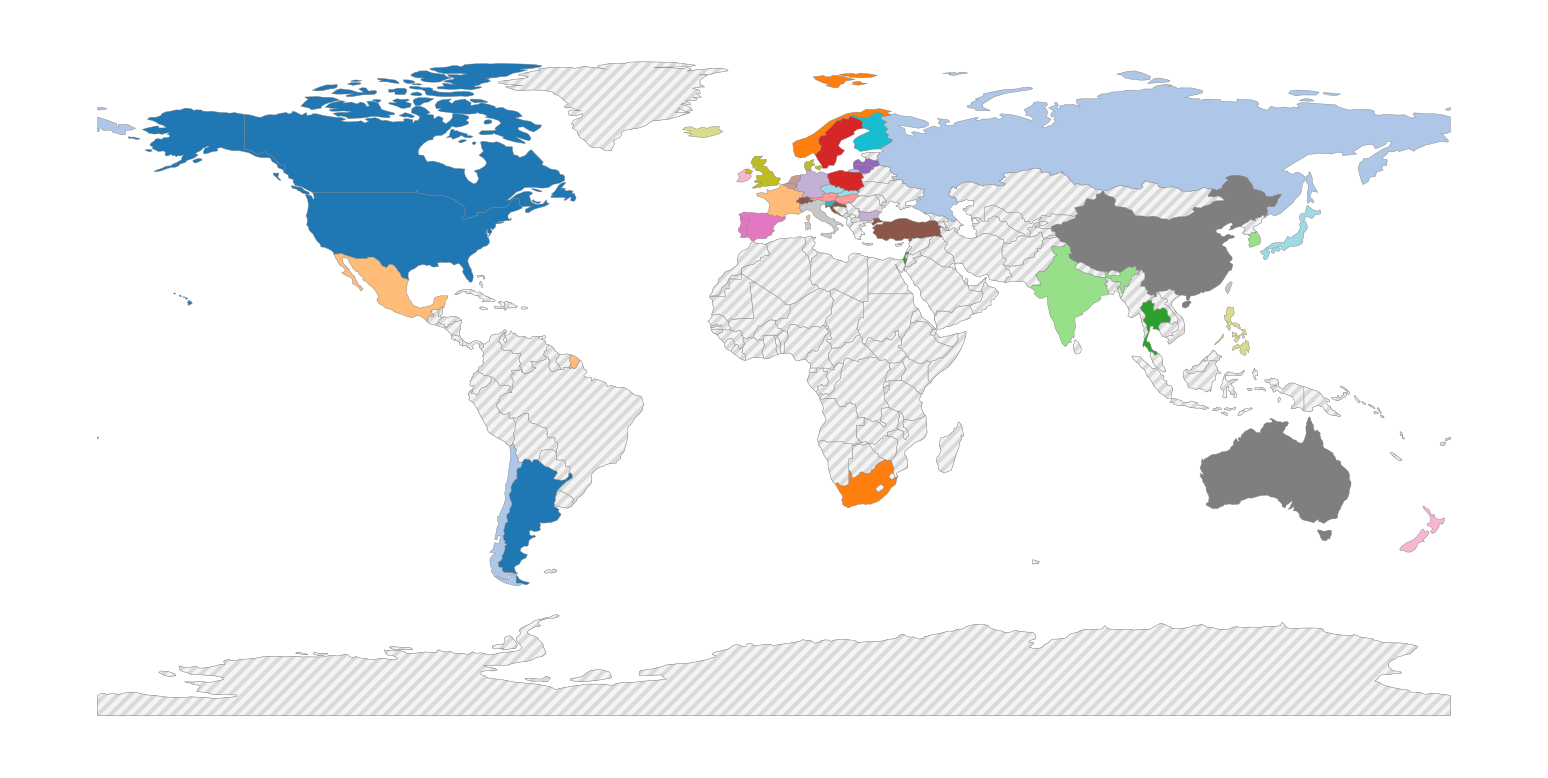

In [201]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : 300,
                     'mathtext.fontset' : 'stix', 
                     'font.family' : 'STIXGeneral'
                    })

fig, ax = plt.subplots()
worldmap.query("in_issp_1993 == True or in_issp_2000 == True or in_issp_2010 == True or in_issp_2020 == True").plot(cmap="tab20", edgecolor="grey", linewidth=0.1, ax=ax)
worldmap.query("in_issp_1993 == False and in_issp_2000 == False and in_issp_2010 == False and in_issp_2020 == False").plot(color=[1,1,1], edgecolor="gray", linewidth=0.1, hatch="////////", ax=ax)
worldmap.query("in_issp_1993 == False and in_issp_2000 == False and in_issp_2010 == False and in_issp_2020 == False").plot(edgecolor="gray", linewidth=0.1, color=[0.95,0.95,0.95], alpha=0.8, ax=ax)
plt.axis("off");

In [202]:
worldmap.to_pickle("Processed_Data/misc/worldmap.pickle")